<a href="https://colab.research.google.com/github/MOULIK-RAZDAN/LINEAR-REGRESSION-ON-INSURANCE-POLICY/blob/main/Linear_Regression_on_Insurance_policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
medical_urls = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve
urlretrieve(medical_urls,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f912c4517d0>)

In [67]:
import pandas as pd
import numpy as np


In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#EXPLORATORY DATA ANNALYSIS

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [10]:
#set default size and font of the visualization
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16,9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## AGE

In [11]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [20]:
fig = px.histogram(medical_df,x = 'age',marginal='box',nbins=47,title='Distribution of age',)
fig.update_layout(bargap = 0.1)
fig.show()

In [43]:
medical_df.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

#BODY MASS INDEX


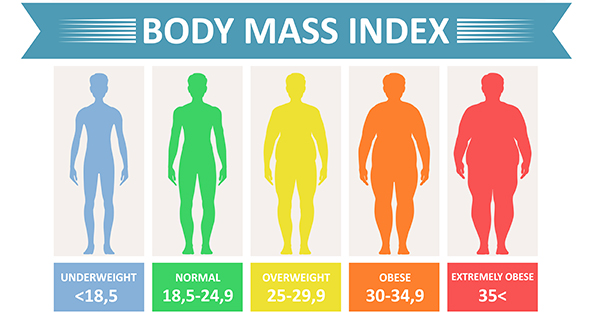

In [19]:
fig = px.histogram(medical_df,x = 'bmi',title = 'Body mass Index',marginal= 'violin',color_discrete_sequence=['grey'])
fig.update_layout(bargap = 0.1)
fig

BMI follows a gaussian distribution.It would be easier for us to analyze data.

In [15]:
fig = px.scatter(medical_df,x = 'bmi',y='age',title = 'Distribution of age and BMI over gender',color = 'sex')
#fig.update_layout(bargap = 0.1)
fig

##BMI over charges


In [130]:
fig = px.scatter(medical_df,x ='bmi',y='charges',color = 'smoker',hover_data=['sex'],title = 'BMI vs charges')
fig

#CHARGES

In [38]:
fig = px.histogram(medical_df,x ='charges',title = 'annual medical charges',color= 'smoker',color_discrete_sequence=['grey','wheat'])
fig.update_layout(bargap = 0.1)
fig

In [124]:
fig = px.scatter(medical_df,x = 'age',y = 'charges',color = 'smoker',title = 'varaition of charges over age')
fig

The data can be divided into three clusters



*   1st group will contains only smokers (represented by blue color)
*   2nd group will contains smokers and non-smokers
*   3rd group will contains only non-smokers (represented by red color)



* It is evident from the scatterplot that the persons who smoke are ought to pay more premium for the insurance.


* The data is depended upon whether the person is a smoker or not.






#SMOKER


In [120]:
medical_df.value_counts('smoker')

smoker
no     1064
yes     274
dtype: int64

In [97]:
274/(1064+274)*100


20.47832585949178

20% percent of people are smokers


In [ ]:
medical_df.value_counts(['age','smoker'],sort=True).head(50)

In [59]:
fig= px.pie(medical_df,names ='age',color = 'smoker',color_discrete_sequence=['grey','wheat'] )
fig

In [122]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker',color_discrete_sequence=['lightblue','orange'])

In [132]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


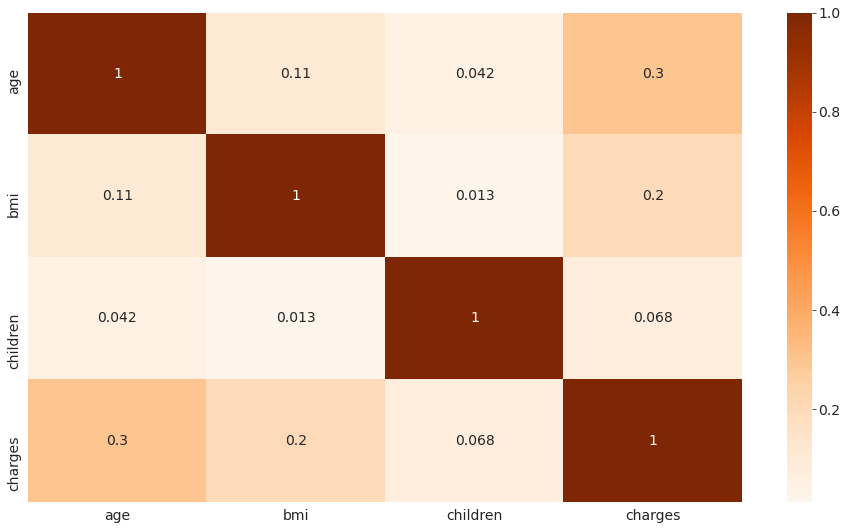

In [137]:
sns.heatmap(medical_df.corr(),cmap='Oranges',annot=True)
